In [77]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


loc = r"/Users/raulbv/Google Drive/My Drive/Documents/Cosmic_Web/halos_E_3dalphashape_200x200x30.npy"    # path to halo file

data = np.load(loc)
x, y, z = data.T

points = data

# Define alpha shape parameters and create alphashape
alpha = 9

alpha_shape = alphashape.alphashape(data, 1/alpha)          # Note that the radius of the circle is given by 1/alpha

# Draw alpha shape
alpha_shape.show()

In [67]:
# Extract halo data
loc = r"/Users/raulbv/Google Drive/My Drive/Documents/Cosmic_Web/halos_0.0.ascii"    # path to halo file

df = pd.read_csv(loc, delimiter=" ", usecols=["x", "y", "z", "m200b", "PosUncertainty"])[18:].astype(np.float)
x, y, z, pos_sigma, m200b = df.values.astype(np.float).T 
log_m = np.log10(m200b)

points = np.array([x,y,z]).T

print(points)

[[  9.313062   1.361789   0.435895]
 [  1.342436  12.698437  12.060183]
 [ 11.420471   9.257522   1.610707]
 ...
 [294.789948 297.752045 294.241608]
 [296.842926 297.646484 294.695496]
 [299.392853 297.2901   297.418976]]


/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-67-6f94dfe014f7>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = pd.read_csv(loc, delimiter=" ", usecols=["x", "y", "z", "m200b", "PosUncertainty"])[18:].astype(np.float)
<ipython-input-67-6f94dfe014f7>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you

<ipython-input-66-af527b59694a>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


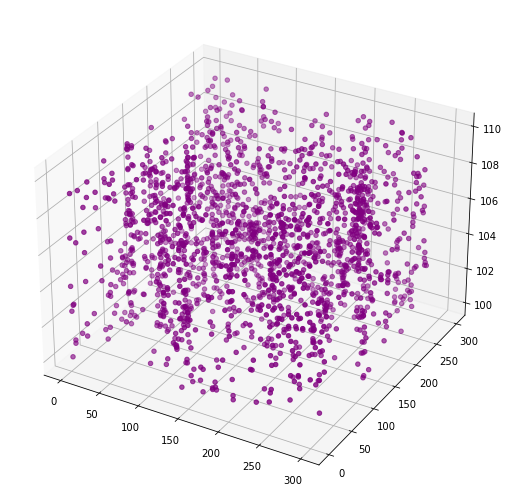

In [66]:
# Slicing simulation box through z and sampling based on mass
z_i, z_f = 100, 110                                             # condition to slice box

mask_slice = (df['z'] >= z_i) & (df['z'] <= z_f)
df_s = df[mask]

# Extract points
x_s, y_s, z_s = df_s['x'], df_s['y'], df_s['z']
points_s = np.array([x_s,y_s,z_s]).T

# Plotting point distribution in 3d:
if True:
    fig = plt.figure(figsize=(13,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_s, y_s, z_s, color="purple")

    fig.show()

# Define alpha shape parameters and create alphashape
alpha = 12

alpha_shape = alphashape.alphashape(points_s, 1/alpha)          # Note that the radius of the circle is given by 1/alpha

# Draw alpha shape
alpha_shape.show()

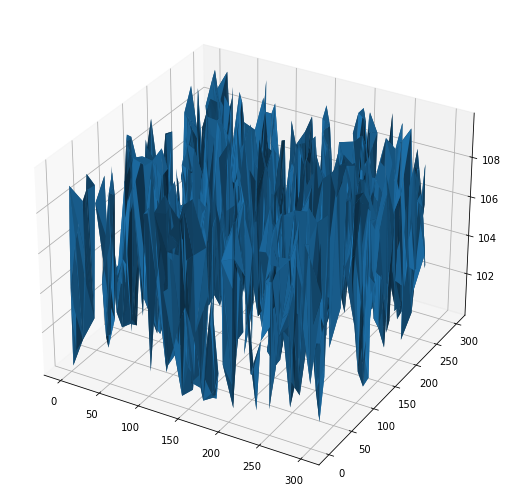

In [50]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
plt.show()

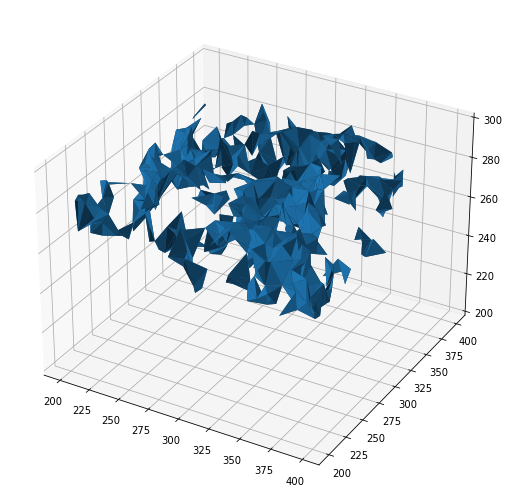

In [79]:
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(*zip(*alpha_shape.vertices), triangles=alpha_shape.faces)
ax.set_zlim3d(200, 300)
plt.show()

In [60]:
import numpy as np
import io
from PIL import Image

data = alpha_shape.save_image(resolution=(1080,1080))
image = np.array(Image.open(io.BytesIO(data))) 

AttributeError: 'Trimesh' object has no attribute 'save_image'

In [63]:
print(dir(alpha_shape.visual.main_color))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

AttributeError: can't set attribute